In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob

In [23]:
df = pd.read_csv('parent-mutant.csv')

In [24]:
df

,parent_fit,mutant_fit,repr
0,1.022175,0.801671,9
1,1.022175,0.561740,9
2,1.022175,0.839795,9
3,1.022175,0.121532,9
4,1.022175,0.216077,9
...,...,...,...
45255,0.075199,0.081688,1
45256,0.075199,0.075199,1
45257,0.075199,0.075150,1
45258,0.075199,-0.010570,1


In [25]:
df = df.applymap(lambda x: max(x, 0))

In [26]:
sorted(df['repr'].unique())

[0, 1, 4, 9]

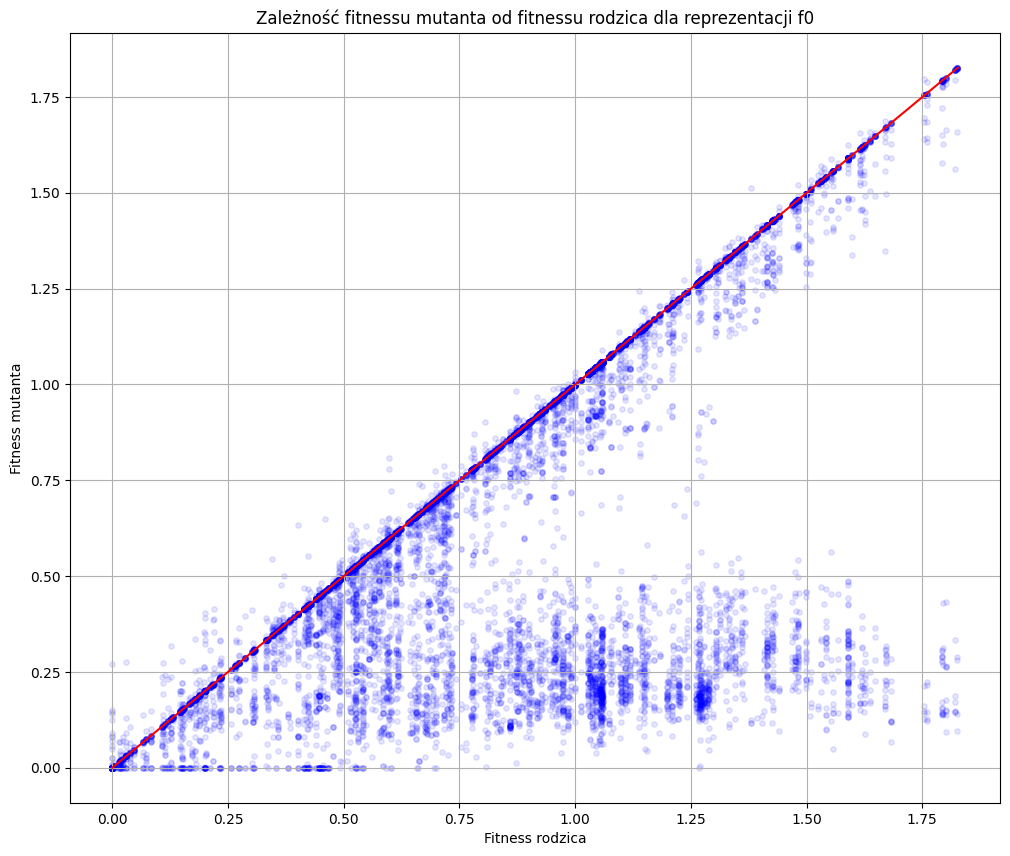

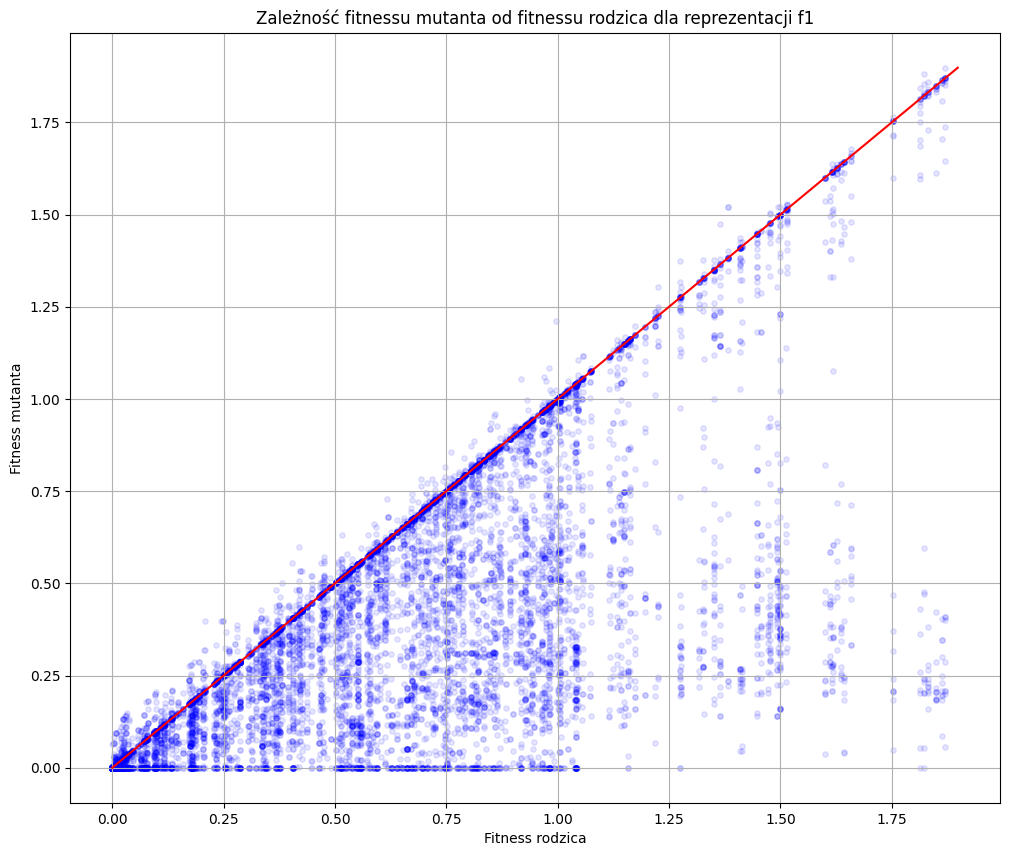

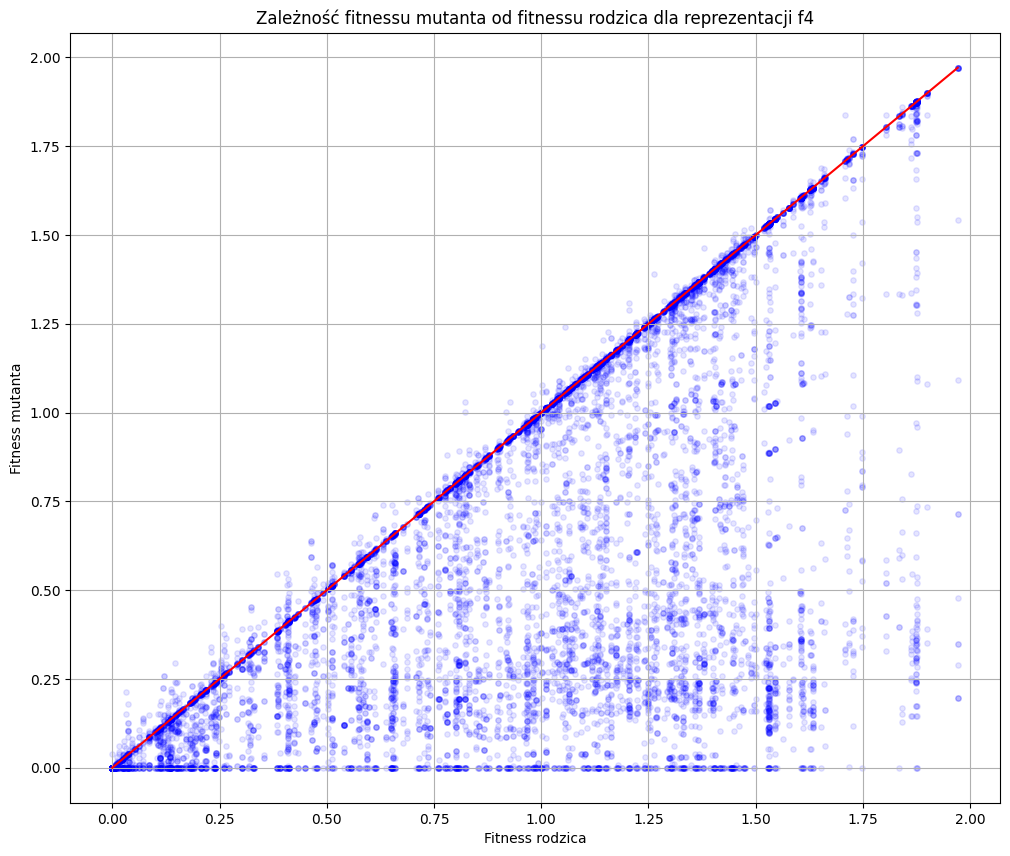

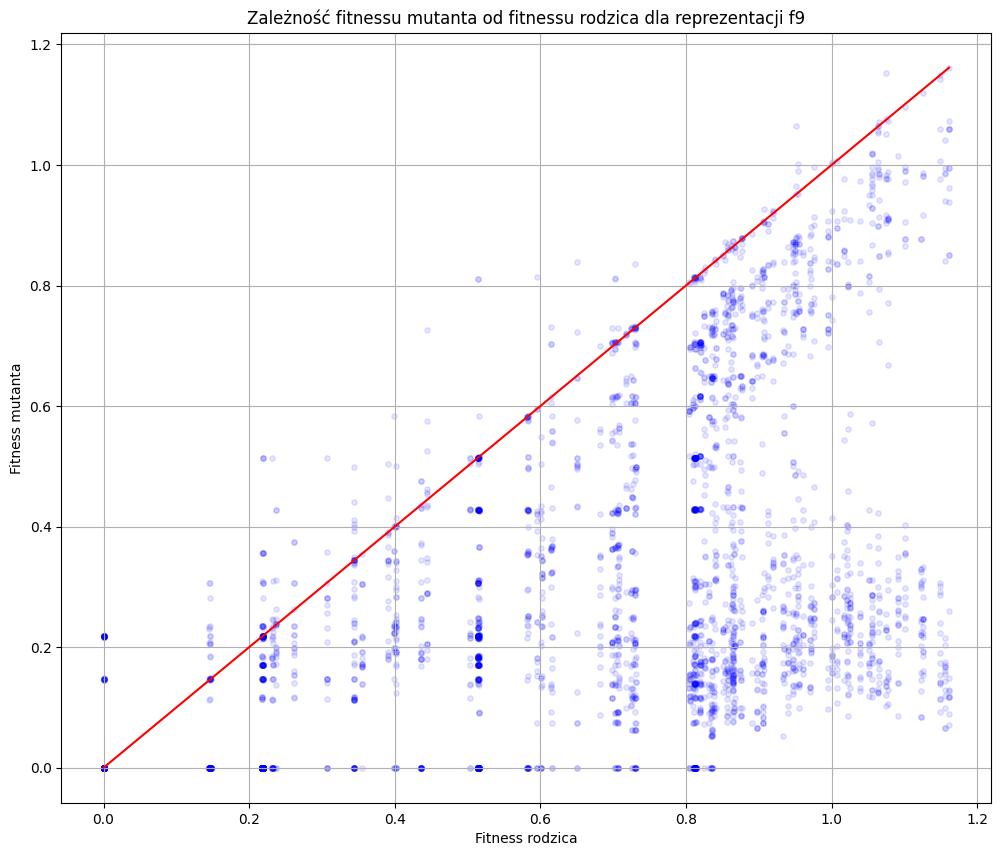

In [32]:
for repr in sorted(df['repr'].unique()):
    df_repr = df[df['repr'] == repr]
    plt.figure(figsize=(12, 10))
    plt.scatter(df_repr['parent_fit'], df_repr['mutant_fit'], color='blue', alpha=0.1, s=15)
    x = np.linspace(min(df_repr['parent_fit'].min(), df_repr['mutant_fit'].min()), 
                max(df_repr['parent_fit'].max(), df_repr['mutant_fit'].max()), 100)
    plt.plot(x, x, color='red', label='y = x')
    plt.title(f'Zależność fitnessu mutanta od fitnessu rodzica dla reprezentacji f{repr}')
    plt.xlabel('Fitness rodzica')
    plt.ylabel('Fitness mutanta')
    plt.grid(True)
    plt.show()

In [28]:
df['child_better'] = df.apply(lambda row: 1 if row['mutant_fit'] > row['parent_fit'] else 0, axis=1)

In [29]:
for repr in sorted(df['repr'].unique()):
    df_repr = df[df['repr'] == repr]
    print(f'f{repr}: {df_repr["child_better"].mean()*100:0.2f}%')

f0: 9.25%
f1: 10.16%
f4: 9.83%
f9: 5.90%
